In [5]:
import pandas as pd
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.performance import (
    factor_information_coefficient,
    mean_information_coefficient,
)
from alphalens.plotting import (
    plot_ic_ts,
    plot_information_table,
)
from alphalens.performance import (
    factor_returns,
    factor_cumulative_returns,
    mean_return_by_quantile,
    compute_mean_returns_spread,
    factor_alpha_beta,
)

In [7]:
# read the cached backtest results into a DataFrame
mean_reversion = pd.read_pickle('D:/AlgoT/Mycode/Event-Based-Testing/mean_reversion.pickle')

In [8]:
# A DataFrame with symbols in the columns and dates in the rows
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

In [9]:
# convert column names to strings
prices.columns = [col.symbol for col in prices.columns]

In [10]:
# normalize the data
prices.index = prices.index.normalize()

In [11]:
display(prices)

,AAL,AAPL,ABBV,AET,AGN,AIG,AMGN,AMZN,APC,AVGO,...,BBY,EFX,EL,DWDP,SBAC,ANTM,AMT,PCG,CBS,TMO
2016-01-04 00:00:00+00:00,40.91,105.35,57.61,109.26,307.47,60.43,158.34,636.99,49.13,142.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,40.91,105.35,57.61,109.26,307.47,60.43,158.34,636.99,49.13,142.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06 00:00:00+00:00,40.91,105.35,57.61,109.26,307.47,60.43,158.34,636.99,49.13,142.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07 00:00:00+00:00,40.91,105.35,57.61,109.26,307.47,60.43,158.34,636.99,49.13,142.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 00:00:00+00:00,40.91,105.35,57.61,109.26,307.47,60.43,158.34,636.99,49.13,142.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,NaN,176.42,98.19,177.34,170.91,NaN,176.14,1190.58,NaN,264.39,...,NaN,NaN,NaN,71.39,NaN,227.02,NaN,NaN,59.00,NaN
2017-12-26 00:00:00+00:00,NaN,170.57,97.75,180.42,164.44,NaN,176.09,1176.76,NaN,258.10,...,NaN,NaN,NaN,71.44,NaN,225.43,NaN,44.45,60.19,NaN
2017-12-27 00:00:00+00:00,NaN,170.57,97.75,180.42,164.44,NaN,176.09,1176.76,NaN,258.10,...,NaN,NaN,NaN,71.44,NaN,225.43,NaN,44.45,60.19,NaN
2017-12-28 00:00:00+00:00,NaN,170.57,97.75,180.42,164.44,NaN,176.09,1176.76,NaN,258.10,...,NaN,NaN,NaN,71.44,NaN,225.43,NaN,44.45,60.19,NaN


In [12]:
# a DataFrame with symbols in the columns and factor rank in the rows
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

In [13]:
# convert column names to strings
factor_data.columns = [
    col.symbol for col in factor_data.columns
]

In [14]:
# normalize the data
factor_data.index = factor_data.index.normalize()

In [15]:
# A MultiIndex with date in level 0 and symbol in level 1
factor_data = factor_data.stack()

In [16]:
# Rename the MultiIndex
factor_data.index.names = ["date", "asset"]

In [17]:
display(factor_data)

date                       asset
2016-01-04 00:00:00+00:00  AAL      1156.0
                           AAPL     2547.0
                           ABBV      438.0
                           AET       893.0
                           AGN      1371.0
                                     ...  
2017-12-29 00:00:00+00:00  ISRG     2449.0
                           DWDP     1277.0
                           ANTM     1510.0
                           PCG      2440.0
                           CBS       292.0
Length: 50275, dtype: float64

In [18]:
# create a MultiIndex Data with foward returns, factor values, and factor quantiles
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or speci

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [19]:
display(alphalens_data)

5D       10D       21D       63D  \
date                      asset                                           
2016-01-04 00:00:00+00:00 AAL    0.004155 -0.050110 -0.037399  0.041066   
                          AAPL  -0.064737 -0.082487 -0.084670  0.054770   
                          ABBV  -0.064746 -0.045478 -0.055893  0.027773   
                          AET   -0.036061 -0.040454 -0.053908 -0.064800   
                          AGN   -0.026344 -0.050997 -0.080561 -0.097310   
...                                   ...       ...       ...       ...   
2017-09-29 00:00:00+00:00 ADP    0.004595  0.004595  0.004595  0.004595   
                          COL    0.011153  0.024537  0.035920  0.035920   
                          BBY    0.059996  0.089902  0.089902  0.089902   
                          EFX    0.025883  0.068132  0.037301  0.027976   
                          SBAC   0.009967  0.044323  0.044323  0.044323   

                                 factor  factor_quantile  
date                      asset                           
2016-01-04 00:00:00+00:00 AAL    1156.0                3  
                          AAPL   2547.0                5  
                          ABBV    438.0                1  
                          AET     893.0                2  
                          AGN    1371.0                4  
...                                 ...              ...  
2017-09-29 00:00:00+00:00 ADP    1239.0                3  
                          COL    2196.0                4  
                          BBY    2486.0                5  
                          EFX    2501.0                5  
                          SBAC   2390.0                5  

[43995 rows x 6 columns]

In [20]:
# generate the information coefficient for each holding period on each date
ic = factor_information_coefficient(alphalens_data)

In [21]:
display(ic)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-05 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-06 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-07 00:00:00+00:00,-0.248066,-0.284107,-0.182742,-0.106800
2016-01-08 00:00:00+00:00,-0.248066,-0.263740,-0.182742,-0.085559
...,...,...,...,...
2017-09-25 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.037130
2017-09-26 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.094793
2017-09-27 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.094793


In [22]:
# inspect the statistical properties of the IC at each forward return
plot_information_table(ic)

Information Analysis


,5D,10D,21D,63D
IC Mean,0.023,0.031,0.018,0.014
IC Std.,0.186,0.165,0.155,0.166
Risk-Adjusted IC,0.124,0.186,0.116,0.084
t-stat(IC),2.599,3.894,2.426,1.757
p-value(IC),0.010,0.000,0.016,0.080
IC Skew,0.153,0.104,0.530,0.404
IC Kurtosis,-0.247,-0.554,0.246,-0.221


<Axes: >

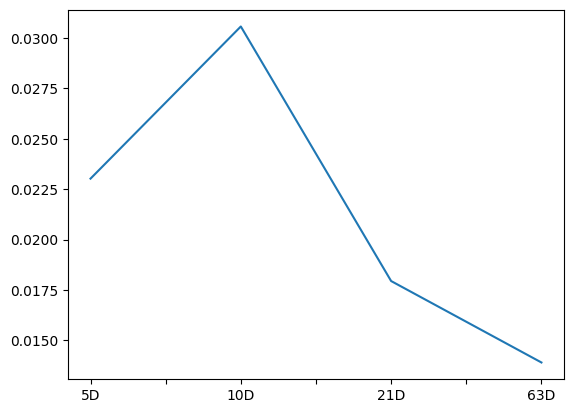

In [23]:
# graph of the IC forward return period to inspect how the alpha decays over 63 days
ic_mean = mean_information_coefficient(alphalens_data)
ic_mean.plot()

array([<Axes: title={'center': '5D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

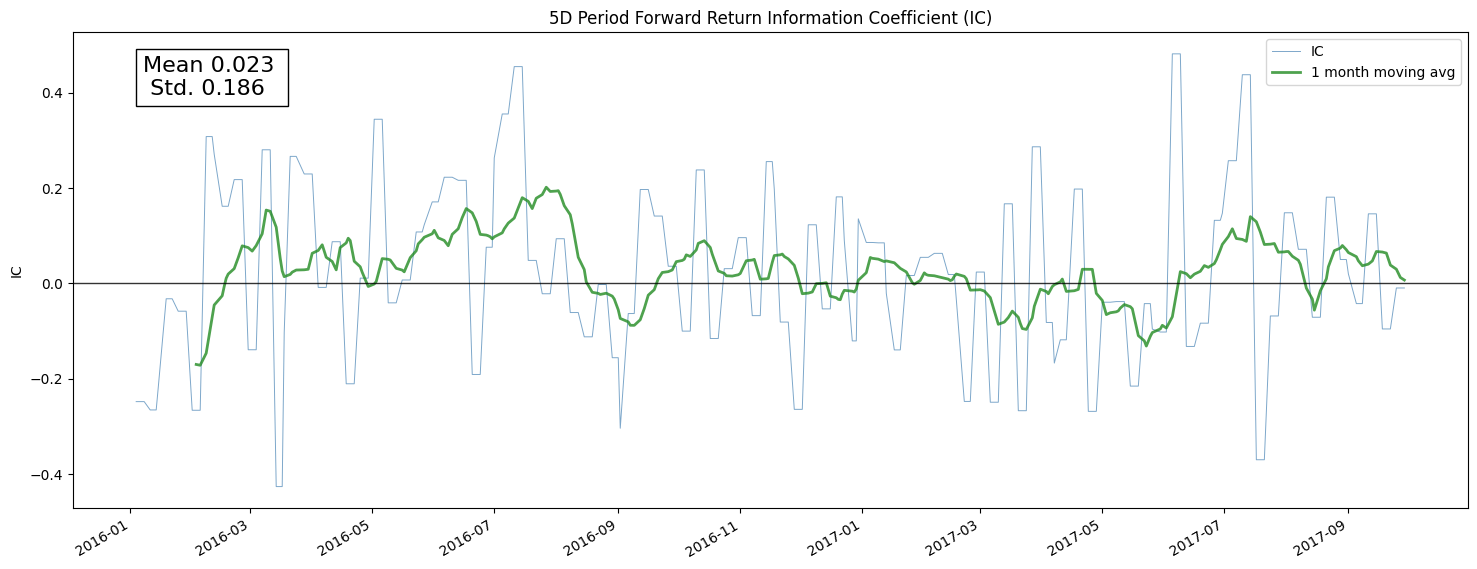

In [24]:
# visualize how IC evolves through time
plot_ic_ts(ic[["5D"]])

C:\Users\tsebo\AppData\Local\Temp\tmpee1fght1\ipykernel_3440\633904321.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ic_by_quarter = ic.resample("Q").mean()
C:\Users\tsebo\AppData\Local\Temp\tmpee1fght1\ipykernel_3440\633904321.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ic_by_quarter.index = ic_by_quarter.index.to_period("Q")


<Axes: xlabel='date'>

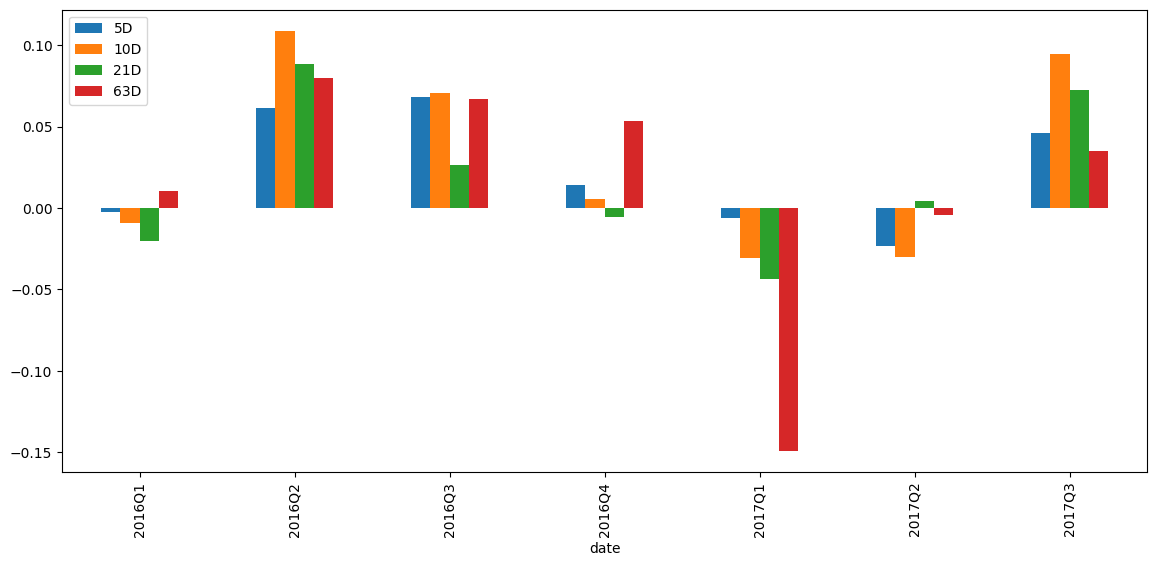

In [25]:
ic_by_quarter = ic.resample("Q").mean()
ic_by_quarter.index = ic_by_quarter.index.to_period("Q")
ic_by_quarter.plot.bar(figsize=(14, 6))

In [49]:
# compute the period-wise, returns for the portfolio weighted by the factor values
returns = factor_returns(alphalens_data)

In [51]:
display(returns)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.016253,-0.027134,-0.013492,-0.015658
2016-01-05 00:00:00+00:00,-0.016253,-0.027134,-0.013492,-0.015658
2016-01-06 00:00:00+00:00,-0.016253,-0.027134,-0.013492,-0.015658
2016-01-07 00:00:00+00:00,-0.016253,-0.027134,-0.026664,-0.015658
2016-01-08 00:00:00+00:00,-0.016253,-0.026459,-0.026664,-0.011788
...,...,...,...,...
2017-09-25 00:00:00+00:00,-0.003797,-0.001202,0.000069,0.000902
2017-09-26 00:00:00+00:00,-0.003797,-0.001202,0.000069,-0.006470
2017-09-27 00:00:00+00:00,-0.003797,-0.001202,0.000069,-0.006470


In [53]:
# see the returns on a per-asset basis
returns = factor_returns(alphalens_data, by_asset=True)

In [57]:
display(returns)

5D       10D       21D       63D
date                      asset                                        
2016-01-04 00:00:00+00:00 AAL   -0.000006  0.000078  0.000058 -0.000064
                          AAPL  -0.001374 -0.001751 -0.001797  0.001162
                          ABBV   0.000862  0.000605  0.000744 -0.000370
                          AET    0.000211  0.000237  0.000316  0.000380
                          AGN   -0.000052 -0.000100 -0.000158 -0.000191
...                                   ...       ...       ...       ...
2017-09-29 00:00:00+00:00 ADP   -0.000008 -0.000008 -0.000008 -0.000008
                          COL    0.000130  0.000285  0.000417  0.000417
                          BBY    0.000939  0.001407  0.001407  0.001407
                          EFX    0.000411  0.001081  0.000592  0.000444
                          SBAC   0.000143  0.000635  0.000635  0.000635

[43995 rows x 4 columns]

<Axes: xlabel='date'>

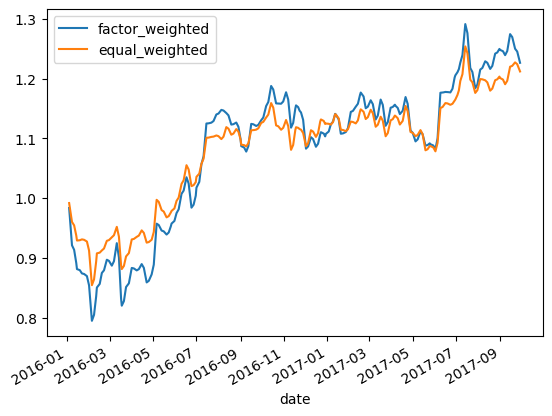

In [59]:
# graph of the factor-weighted. cumulative portfolio returns for the 5 day forward return
# against the equal-weighted portfolio
pd.concat(
    {
        "factor_weighted": factor_cumulative_returns(
            alphalens_data,
            period="5D"
        ),
        "equal_weighted": factor_cumulative_returns(
            alphalens_data,
            period="5D",
            equal_weight=True
        ),
    },
    axis=1,
).plot()

<Axes: xlabel='factor_quantile'>

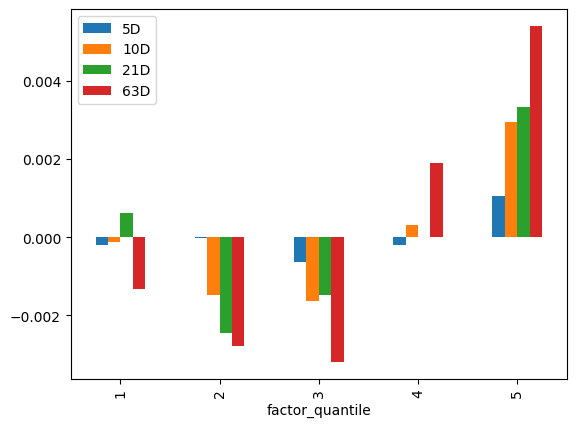

In [61]:
# calculate the mean returns for factor quantiles across the forward returns
mean_returns, _ = mean_return_by_quantile(alphalens_data)
mean_returns.plot.bar()

In [63]:
# calculate the difference in mean returns between the portfolios at the upper and lower quantiles
mean_returns_by_date, _ = mean_return_by_quantile(
    alphalens_data,
    by_date=True
)
mean_return_difference, _ = compute_mean_returns_spread(
    mean_returns = mean_returns_by_date,
    upper_quant=1,
    lower_quant=5,
)

C:\Users\tsebo\AppData\Local\Temp\tmpee1fght1\ipykernel_3440\4011285568.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\tsebo\AppData\Local\Temp\tmpee1fght1\ipykernel_3440\4011285568.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .to_period("M")


<Axes: xlabel='date'>

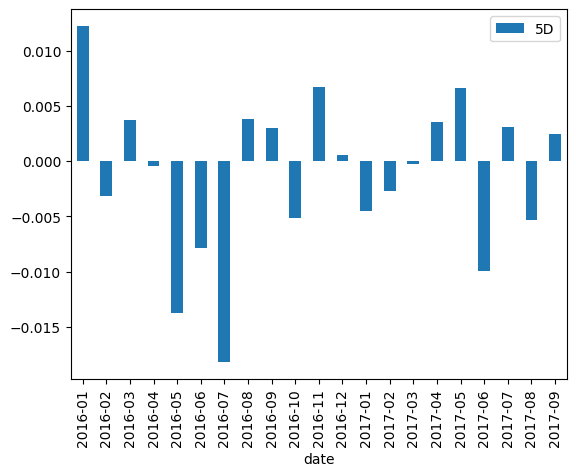

In [65]:
# Resample the results from daily values to monthly, take their mean, and plot them
(
    mean_return_difference[["5D"]]
    .resample("M")
    .mean()
    .to_period("M")
    .plot
    .bar()
)

In [67]:
factor_alpha_beta(alphalens_data)

,5D,10D,21D,63D
Ann. alpha,0.006204,0.015760,-0.003038,-0.012823
beta,0.136634,0.123627,0.117090,0.147144
